Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men


In [9]:
#step 1
import pandas as pd
#step 2 -3
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep = '|')
#step 4
mean_age = users.groupby('occupation')['age'].mean()
print(mean_age)
#step 5
ratio_male = users[users['gender'] == 'M'].groupby('occupation').size() / users.groupby('occupation').size()

sort_ratio = ratio_male.sort_values(ascending = False)
print(sort_ratio)
#step 6

min_age = users.groupby('occupation')['age'].min()

max_age = users.groupby('occupation')['age'].max()

print(min_age)
print(max_age)

#step 7
occup_x_sex_age = users.groupby(['occupation', 'gender'])['age'].mean()

print(occup_x_sex_age)

#step 8
ratio_women = users[users['gender'] == 'F'].groupby('occupation').size() / users.groupby('occupation').size()

perc_male = ratio_male * 100
perc_women = ratio_women * 100

print(perc_male)
print(perc_women)


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.57

Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goals
Step 11. Select the teams that start with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia


In [36]:
#step 1- 3
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep = (','))
#Step 4
goal_col = euro12['Goals']
#Step 5
num_teams = euro12['Team'].count()
print(f'the number of teams that participated on the Euro 2012 was{num_teams}')
#Step 6
num_col = len(euro12.columns)
print(f'The number of columns of this data set is{num_col}')
#step 7
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
#step 8
sort_red = discipline.sort_values('Red Cards')
print(sort_red.head())
sorted_yellow = discipline.sort_values('Yellow Cards')
print(sorted_yellow.head())
#step 9
mean_yellow = discipline['Yellow Cards'].mean()
print(mean_yellow)
#Step 10
more_6 = euro12[euro12['Goals']>6]
print(f'The teams with more than 6  goals are: {more_6}')
#step 11
G_teams = euro12[euro12['Team'].str.startswith('G') | euro12['Team'].str.startswith('g')]
print(f'The teams which name starts with "G" are: {G_teams}')

#step 12
col_7 = euro12.iloc[:,:7]
#step 13
col_but3 = euro12.iloc[:,:-3]
#step 14
teams = ['England', 'Italy', 'Russia']

sht_teams = euro12.loc[euro12['Team'].isin(teams), ['Team', 'Shooting Accuracy']]

print(f'The shot accuarcy for Envlang, Italy and Russia are: {sht_teams}')

the number of teams that participated on the Euro 2012 was16
The number of columns of this data set is35
             Team  Yellow Cards  Red Cards
0         Croatia             9          0
1  Czech Republic             7          0
2         Denmark             4          0
3         England             5          0
4          France             6          0
           Team  Yellow Cards  Red Cards
2       Denmark             4          0
5       Germany             4          0
3       England             5          0
8   Netherlands             5          0
15      Ukraine             5          0
7.4375
The teams with more than 6  goals are:        Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                    

Question 3
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [38]:
#step 1
import numpy as np
#step2
np.random.seed(13)

series1 = pd.Series(np.random.randint(1, 5, size=100))  
series2 = pd.Series(np.random.randint(1, 4, size=100))  
series3 = pd.Series(np.random.randint(10000, 30001, size=100))  
#step 3 - 4
df = pd.concat([series1, series2, series3], axis =1, keys=['bedrs', 'bathrs', 'price_sqr_meter'])
#step 5
df_odd = pd.concat([series1, series2, series3], axis =0, keys=['bedrs', 'bathrs', 'price_sqr_meter'])
#step 6-7
df_odd = df_odd.reset_index(drop = True)


Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.

In [89]:
#Step 1 - 3
data = pd.read_csv('wind.txt', sep='\s+')

data['date'] = pd.to_datetime(data['Yr'].astype(str) + data['Mo'].astype(str).str.zfill(2) + data['Dy'].astype(str).str.zfill(2), format='%y%m%d')

data.drop(['Dy', 'Mo', 'Yr'], axis=1, inplace=True)

#Step 4 - 5
def adjust_year_in_column(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name], format='%Y-%m-%d')
    mask = df[column_name].dt.year > 2023
    df.loc[mask, column_name] -= pd.DateOffset(years=100)

    
adjust_year_in_column(data, 'date')
data.set_index('date', inplace=True)

#Step 6-7

data_num_null = data.isna().sum()
data_no_null =  data.dropna()

total_na =  data.isna().sum().sum()

#step 8
mean_wind = data.mean().mean()

#step 9
loc_stats = pd.DataFrame(index=['min', 'max', 'mean', 'std'])

for col in data_no_null:
    loc_stats[col] = [data_no_null[col].min(), data_no_null[col].max(), data_no_null[col].mean(),
                     data_no_null[col].std()]
#step 10
min_wind = data.min(axis=1)
max_wind = data.max(axis=1)
mean_wind = data.mean(axis=1)
std_wind = data.std(axis=1)

day_stats= pd.DataFrame({'Min': min_wind, 'Max': max_wind, 'Mean': mean_wind, 'Standar Deviation': std_wind})
#step11

january = data[data.index.month == 1]
january_mean = january.mean()

#step 12
yearly = data.groupby(data.index.year).mean()
#step 13
monthly = data.groupby(data.index.month).mean()
#step14
dayly = data.groupby(data.index.day).mean()
 #step 15

da_f = data.resample('D').mean()
week_f = da_f.resample('w').mean()

min_week = week_f.min(axis=1)
max_week = week_f.max(axis=1)
mean_week = week_f.mean(axis=1)
std_week = week_f.std(axis=1)

df_2 = pd.DataFrame({'Min':min_week,'Max':max_week, 'Mean':mean_week, 'Standard Deviation':std_week})

Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [118]:
#Step 1 -3
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')
#Step 4
print(chipo.head(10))
#Step 5
size = chipo.size
print(f'\nThe number of observation is: {size}\n')
#Step 6
columns_number = len(chipo.columns)
print(f'The number of columns is: {columns_number}\n')
#Step 7
print(chipo.columns)
#Step 8
index_type = chipo.index
print(f'\nThe data is indexed by {index_type}\n')
#Step9
item_quantities = chipo.groupby('item_name')['quantity'].sum()

most_ordered_item = item_quantities.idxmax()
quantity_ordered = item_quantities.max()
print(f'The most ordered item is {most_ordered_item}\n')
#Step 10
print(f'{most_ordered_item} was ordered {quantity_ordered}\n')
#Step 11 - Could not do it :<
#Step12
total_items = chipo['quantity'].sum()
print(f'The total number of items ordered is: {total_items}\n')
#Step 13
chipo['item_price'] = pd.to_numeric(chipo['item_price'].str.replace('$', ''), errors='coerce')

price_type = type(chipo['item_price'])
print(f'\nThe type of the variable price is {chipo["item_price"].dtype}\n')

chipo['item_price'] = chipo['item_price'].apply(lambda x: str(x))
print(f'\nThe new type is {chipo["item_price"].dtype}\n')
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))
print(f'\nThe type of the variable price is {chipo["item_price"].dtype}\n')
#Step 14
total_revenue = chipo['item_price'].sum()
print(f'\nThe total revenue is: {total_revenue}')
#Step 15
total_items = chipo['quantity'].sum()
print(f'The total number of items ordered is: {total_items}\n')
#Step 16
total_revenue_per_order = total_revenue/total_items
print(f'The total revenue per order is: ${total_revenue_per_order}')
#Step 17
unique_items = chipo['item_name'].nunique()
print(f'\nThe total number of unique items is: {unique_items}')



   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

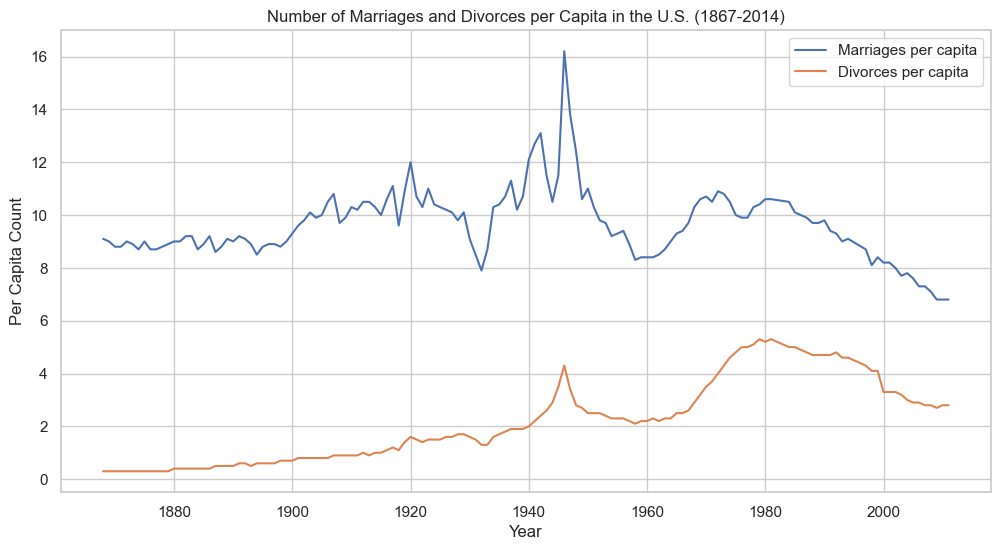

In [124]:
marriage = pd.read_csv('marriage.csv')
import matplotlib.pyplot as plt
import seaborn as sns 

df = marriage[(marriage['Year'] >1867) & (marriage['Year']<2014)]


sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Marriages_per_1000', label='Marriages per capita')
sns.lineplot(data=df, x='Year', y='Divorces_per_1000', label='Divorces per capita')

plt.xlabel('Year')
plt.ylabel('Per Capita Count')
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')


plt.legend()

plt.show()

Question 7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

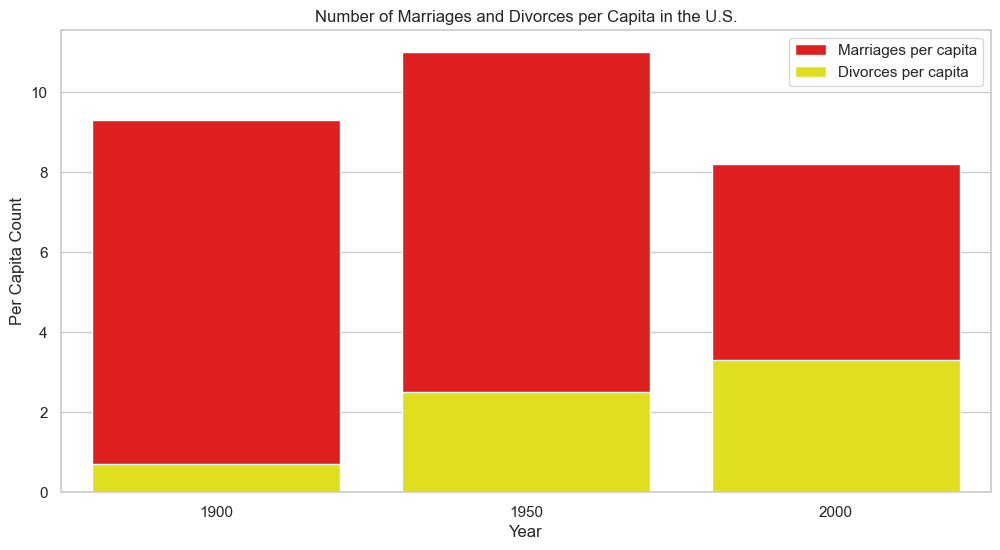

In [129]:
sns.set(style="whitegrid")

df = marriage[(marriage['Year'] ==1900) | (marriage['Year']==1950) | (marriage['Year']==2000)]

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Year', y='Marriages_per_1000', label='Marriages per capita', color='red')
sns.barplot(data=df, x='Year', y='Divorces_per_1000', label='Divorces per capita', color = 'yellow')

plt.xlabel('Year')
plt.ylabel('Per Capita Count')
plt.title('Number of Marriages and Divorces per Capita in the U.S.')


plt.legend()

plt.show()

Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

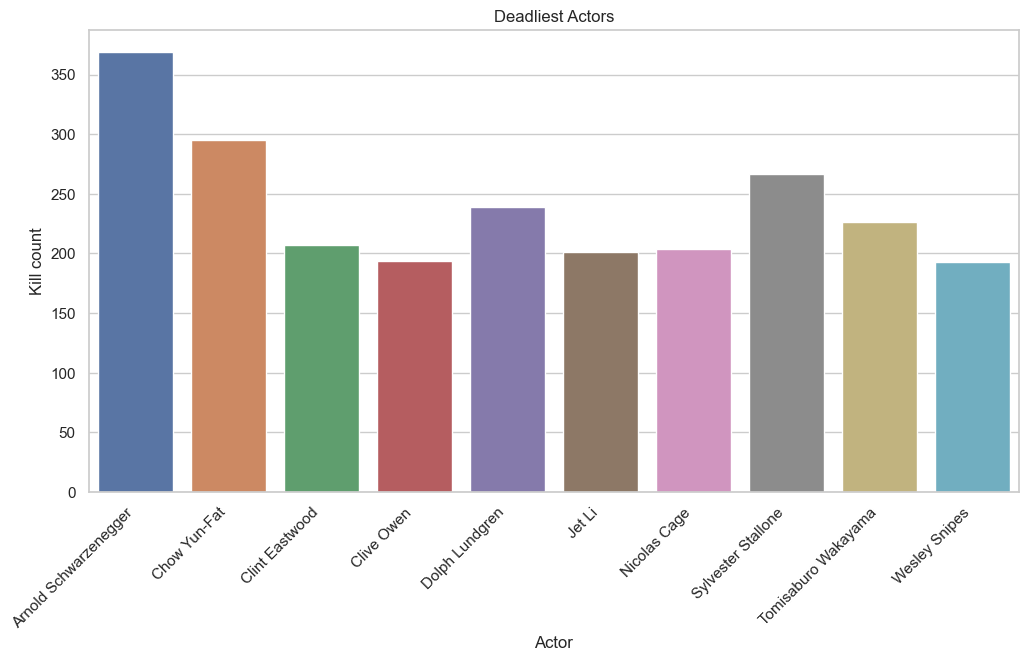

In [137]:
df = pd.read_csv('actor_kill_counts.csv')


sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Actor', y='Count')


plt.xlabel('Actor')
plt.ylabel('Kill count')
plt.title('Deadliest Actors')

plt.xticks(rotation=45, ha='right')


plt.show()

Question 9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

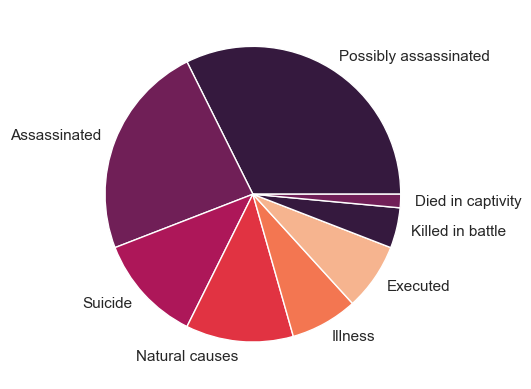

In [144]:
df = pd.read_csv('Roman.csv')


palette = sns.color_palette("rocket")

plt.pie(df['Cause_of_Death'].value_counts(), labels=df['Cause_of_Death'].unique(), colors=palette)


plt.show()


Question 10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

C:\Users\sambf\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


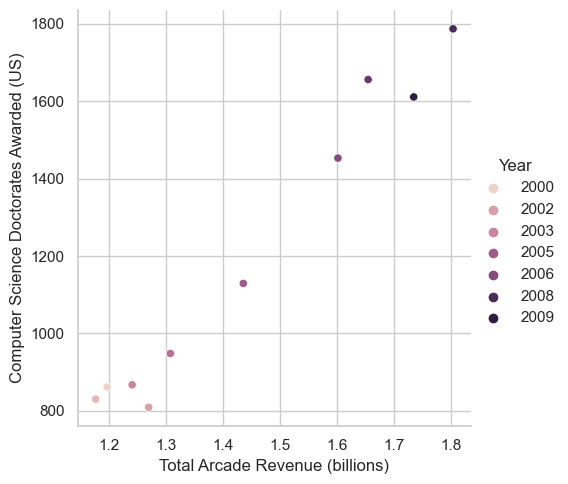

In [151]:
df = pd.read_csv('Doctor.csv')

df = df[(df['Year']>1999) & (df['Year']<2010)]

sns.relplot(data = df, x= 'Total Arcade Revenue (billions)', y = 'Computer Science Doctorates Awarded (US)',
           kind ='scatter', hue = 'Year')

In [152]:

print(df)

#print(mean_yellow)

   Year  Total Arcade Revenue (billions)  \
0  2000                            1.196   
1  2001                            1.176   
2  2002                            1.269   
3  2003                            1.240   
4  2004                            1.307   
5  2005                            1.435   
6  2006                            1.601   
7  2007                            1.654   
8  2008                            1.803   
9  2009                            1.734   

   Computer Science Doctorates Awarded (US)  
0                                       861  
1                                       830  
2                                       809  
3                                       867  
4                                       948  
5                                      1129  
6                                      1453  
7                                      1656  
8                                      1787  
9                                      1611  
